## Setup

In [1]:
import tio4550_housing_energy.utils as u

# This will now work!
u.a_test_function()

Hello from the src folder! The import is working! 🎉


True

## Confusion Matrix

Datasets loaded successfully!
Ground truth shape: (100, 19)
Predictions shape: (100, 19)
--- Evaluation for: vp_bool ---
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90        87
           1       0.36      0.38      0.37        13

    accuracy                           0.83       100
   macro avg       0.63      0.64      0.64       100
weighted avg       0.84      0.83      0.83       100



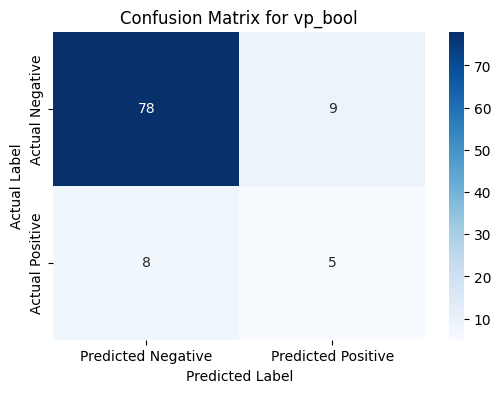



--- Evaluation for: e_bool ---
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        95
           1       0.17      0.20      0.18         5

    accuracy                           0.91       100
   macro avg       0.56      0.57      0.57       100
weighted avg       0.92      0.91      0.91       100



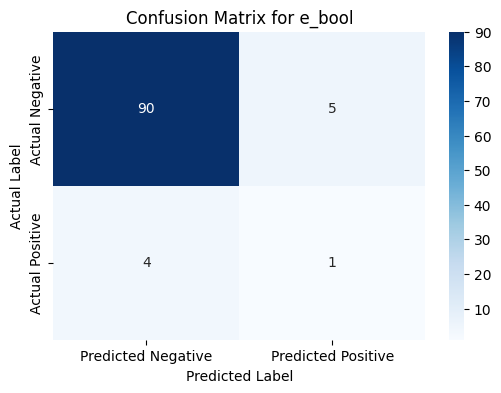



--- Evaluation for: v_bool ---
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        90
           1       0.54      0.70      0.61        10

    accuracy                           0.91       100
   macro avg       0.75      0.82      0.78       100
weighted avg       0.92      0.91      0.92       100



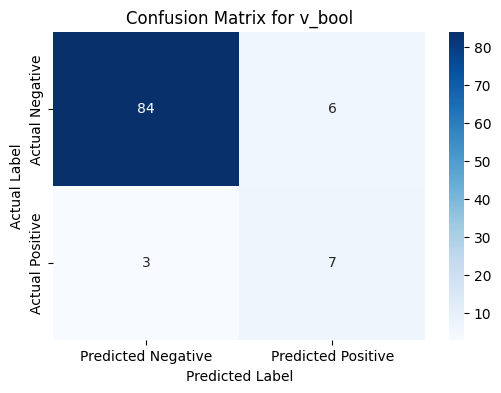



--- Evaluation for: k_bool ---
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        97
           1       0.40      0.67      0.50         3

    accuracy                           0.96       100
   macro avg       0.69      0.82      0.74       100
weighted avg       0.97      0.96      0.96       100



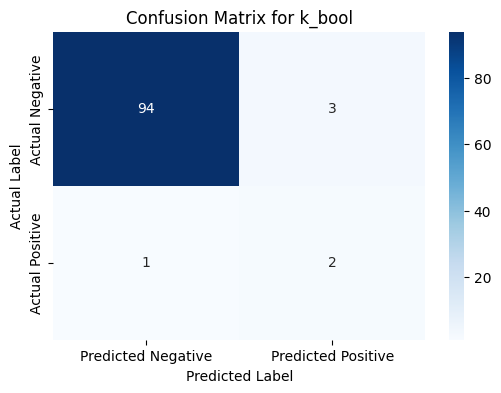



--- Evaluation for: t_bool ---
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93        93
           1       0.22      0.29      0.25         7

    accuracy                           0.88       100
   macro avg       0.58      0.61      0.59       100
weighted avg       0.89      0.88      0.89       100



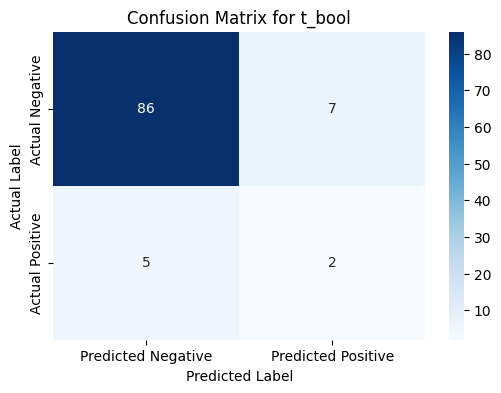



--- Evaluation for: ot_bool ---
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        95
           1       0.00      0.00      0.00         5

    accuracy                           0.93       100
   macro avg       0.47      0.49      0.48       100
weighted avg       0.90      0.93      0.92       100



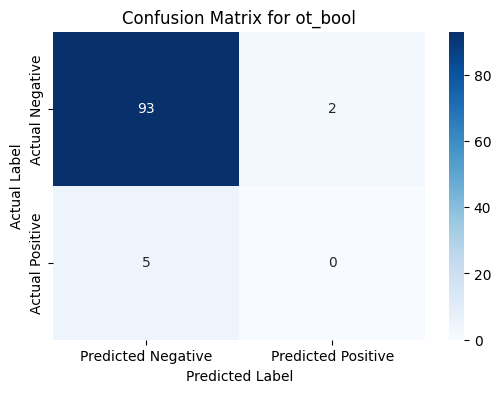



--- Evaluation for: ob_bool ---
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83        73
           1       0.50      0.54      0.52        26
        2017       0.00      0.00      0.00         1

    accuracy                           0.74       100
   macro avg       0.44      0.45      0.45       100
weighted avg       0.74      0.74      0.74       100



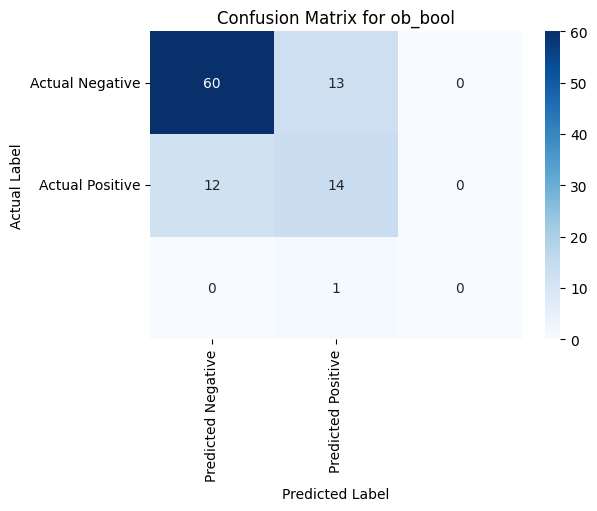



--- Evaluation for: ok_bool ---
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.69      0.74        72
           1       0.39      0.50      0.44        28

    accuracy                           0.64       100
   macro avg       0.59      0.60      0.59       100
weighted avg       0.67      0.64      0.65       100



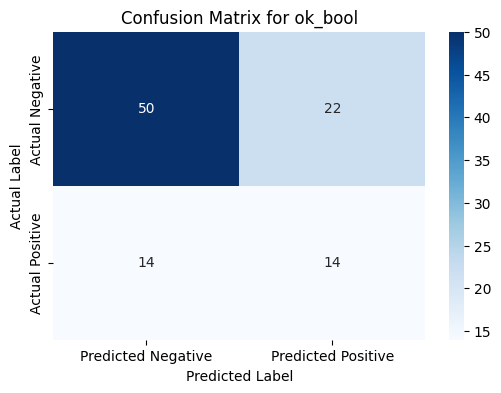



--- Evaluation for: og_bool ---
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        91
           1       0.20      0.33      0.25         9

    accuracy                           0.82       100
   macro avg       0.56      0.60      0.57       100
weighted avg       0.86      0.82      0.84       100



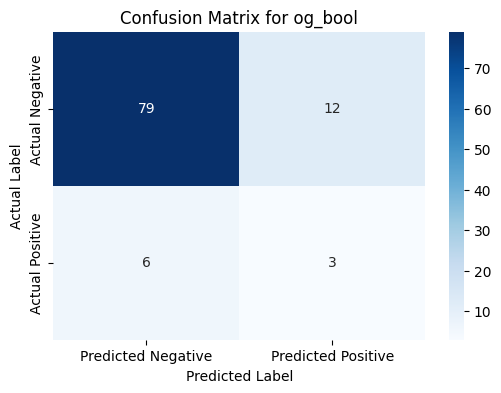

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


try:
    # The ground truth data, manually labeled.
    df_true = pd.read_csv("../data/2_interim/analyzed_ads_manual.csv")

    # The data extracted by the OpenAI model.
    df_pred = pd.read_csv("../data/2_interim/analyzed_ads_automatic.csv")

    print("Datasets loaded successfully!")
    print(f"Ground truth shape: {df_true.shape}")
    print(f"Predictions shape: {df_pred.shape}")
except FileNotFoundError as e:
    print(f"Error loading data: {e}")
    print(
        "Please ensure 'analyzed_ads_manual.csv' and 'analyzed_ads_automatic.csv' are in the 'data/2_interim/' directory."
    )


# Identify the boolean columns to evaluate (assuming they end with '_bool')
bool_columns = [col for col in df_true.columns if col.endswith("_bool")]

for col in bool_columns:
    print(f"--- Evaluation for: {col} ---")

    y_true = df_true[col]
    y_pred = df_pred[col]

    # 1. Classification Report (Precision, Recall, F1-score)
    report = classification_report(y_true, y_pred, zero_division=0)
    print("Classification Report:")
    print(report)

    # 2. Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["Predicted Negative", "Predicted Positive"],
        yticklabels=["Actual Negative", "Actual Positive"],
    )
    plt.title(f"Confusion Matrix for {col}")
    plt.ylabel("Actual Label")
    plt.xlabel("Predicted Label")
    plt.show()
    print("\n" + "=" * 50 + "\n")